<a href="https://colab.research.google.com/github/YogiJungHoonYeon/Artificial-Intelligence-Lang/blob/main/Audio_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Audio Data Tutorial

In [ ]:
!pip install ffmpeg
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=05b064e5ef6a8c3022d3b1623860401939b4ea3f8d2497384e1ab262959b19ab
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import os
from pydub import AudioSegment





In [ ]:
dir_path = os.getcwd()
file_name = os.listdir(dir_path)
print(file_name)

def m4a_convert_wav(m4a, wav):
  audio = AudioSegment.from_file(m4a, format='m4a')
  converted_wav_file = audio.export(wav, format='wav')
  return converted_wav_file

converted_wav_file = m4a_convert_wav(file_name[1],'audio_file.wav')


frequency, data = wavfile.read(converted_wav_file)


['.config', '1533 N McCadden Pl.m4a', 'sample_data']


In [ ]:
print(converted_wav_file)

<_io.BufferedRandom name='audio_file.wav'>


In [ ]:
print(type(frequency), type(data))

<class 'int'> <class 'numpy.ndarray'>


In [ ]:
print(frequency)
print(data.shape)

24000
(84992,)


In [ ]:
ipd.Audio(data, rate=frequency)


# Audio Data Preprocessing

3.541333333333333


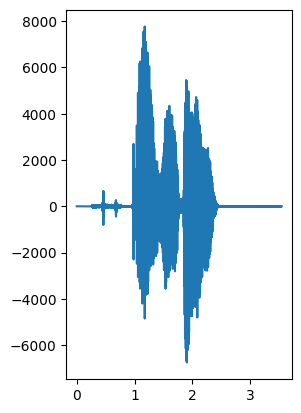

In [ ]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1)
n_of_period = data.shape[0]
Time = n_of_period /frequency
print(Time)
time_space = np.arange(0, Time, 1/24000)
ax1.plot(time_space, data)

#data = amplitude of each one period

In [ ]:
import tensorflow as tf
#FFT_LENGTH = FOURIER TRANSFORM SIZE
#frame_step = frequency * frame_length(sec)
data = tf.cast(data, tf.float32)
spectrogram = tf.signal.stft(data, frame_length = 25, frame_step=600, window_fn=tf.signal.hann_window , pad_end=False
               ,fft_length=512)

In [ ]:
print(spectrogram.shape)
#spectrum.shape[0] = Time / frame_length spectrogram.shape[1] = fft_length//2 +1

(142, 257)


In [ ]:
mel_filter_bank = tf.signal.linear_to_mel_weight_matrix(num_mel_bins=20, num_spectrogram_bins=257,sample_rate=48000,
                                                        lower_edge_hertz=25, upper_edge_hertz=24000, dtype=tf.dtypes.float32)
#num_spectrogram_bins = fft_length //2 + 1 //= 몫 구하기
#mel_filter_bank.shape = [num_spectrogram_bins, num_mel_bins]

In [ ]:
squared_spectrogram = tf.square(spectrogram)
squared_spectrogram = tf.cast(squared_spectrogram, tf.dtypes.float32)
mel_power_spectrogram = tf.matmul(squared_spectrogram, mel_filter_bank)

In [ ]:
import librosa

(142, 20)


[Text(0.5, 1.0, 'Mel_spectrogram')]

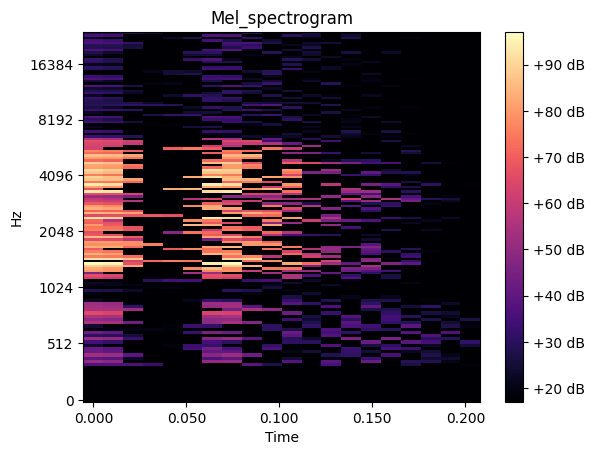

In [ ]:
print(mel_power_spectrogram.shape)
fig,axx = plt.subplots()
log_mel_power_spectrogram = librosa.power_to_db(mel_power_spectrogram)
img = librosa.display.specshow(log_mel_power_spectrogram,ax = axx, sr = 48000, x_axis = 'time', y_axis= 'mel')
fig.colorbar(img, ax= axx, format='%+2.0f dB')

axx.set(title='Mel_spectrogram')


In [ ]:
print(log_mel_power_spectrogram.shape)

(142, 20)


In [ ]:
ax = plt.subplot(1,2,1)


In [ ]:
#np.floor(내림)
#np.ceil(올림)
#np.round(반올림)

In [ ]:
7//3

2

In [ ]:
def windowing(frame,Time,data,frequency):
  #frame = ms
  frame_sec = frame / 1000
  n_of_window = round(Time,1) / frame_sec

  n_of_window = int(n_of_window)
  each_data = frame_sec * frequency
  each_data = int(round(each_data,1))
  frame_data = np.zeros((n_of_window,each_data))
  for i in range(n_of_window):
    for j in range(each_data):
      frame_data[i][j] = data[i*600 + j]
  return frame_data


frame_data = windowing(25,Time,data,frequency)

print(frame_data.shape)




In [ ]:
frame_time_space = np.arange(0,0.025, 1/24000)
print(frame_time_space.shape)
ax2 = plt.subplot(1,2,1)

ax2.plot(frame_time_space, frame_data[121])




#w[n]=0.54−0.46cos(2πn/N−1)



In [ ]:
def hamming_window(frame_data,frame_length):
  hamming_frame = np.zeros_like(frame_data)
  for i in range(frame_data.shape[0]):
    for j in range(frame_data.shape[1]):
      hamming_frame[i][j] = (0.54 - (0.46 * np.cos((2 * j * np.pi)/ (frame_length - 1))))
  return hamming_frame

hamming_frame = hamming_window(frame_data, 0.025)

print(hamming_frame.shape)

ax3 = plt.subplot(1,2,1)
ax3.plot(frame_time_space, hamming_frame[40])


In [ ]:
x = np.arange(0,100,0.5)
y = np.zeros_like(x)
for i in range(x.shape[0]):
  y[i] = 0.54 - (0.46 * np.cos(np.pi * 2 * i/ (0.025-1)))
ax4 = plt.subplot(1,2,1)
print(y[3])
ax4.plot(x,y)

In [ ]:
NFFT=256
fft_frame = np.fft.fft(hamming_frame, NFFT)
fft_frame.shape

In [ ]:
ax5 = plt.subplot(1,2,1)
fft_time_space = np.arange(0,256,1)
ax5.plot(fft_time_space, fft_frame[130])

In [ ]:
for i in range(fft_frame.shape[0]):
  spectrogram = np.zeros(fft_frame.shape[0] * fft_frame.shape[1])
  spectrogram[i*256:i*256 + 256] = fft_frame[i]
print(spectrogram.shape)



In [ ]:
ax6=plt.subplot(1,2,1)
spectrogram_space = np.arange(0,3.584,0.0001)
ax6.plot(spectrogram, spectrogram)

NameError: ignored

In [ ]:
plt

0.9706288624690493


# Librosa

In [ ]:
import librosa

In [ ]:
print(hamming_frame.shape)

(140, 600)


In [ ]:
D = np.abs(librosa.stft(hamming_frame, n_fft = 2048, win_length = 2048, hop_length = 512))

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=600
  warnings.warn(


In [ ]:
print(D.shape)

(140, 1025, 2)


In [ ]:
sr = 44100
mfcc = librosa.feature.mfcc(S = librosa.power_to_db(D), sr = sr, n_mfcc = 20)

In [ ]:
print(mfcc.shape)

(140, 20, 2)
